In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [3]:
canv = ROOT.TCanvas("canv","canv",900,450)
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


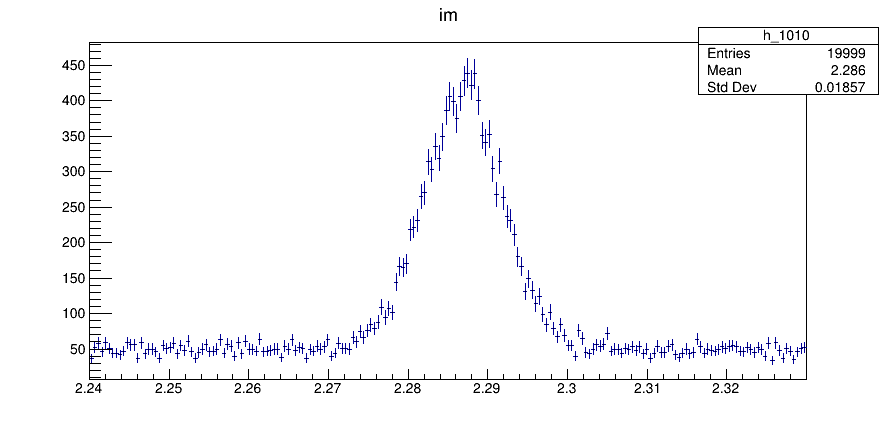

In [4]:
sig = Models.Gauss_pdf("sig",xvar=im,mean=(2.287),sigma=(0.005))
bkg = Models.PolyPos_pdf("bkg", xvar=im, power=0)
model = Models.Fit1D(signal=sig, background=bkg)
large_ds = model.generate(20000)
large_ds.draw("im")
canv.Draw()

# Fit1D(FitsigF)                   WARNING The variable name "S" is already defined!
# Fit1D(FitsigF)                   WARNING The variable name "B" is already defined!



  RooFitResult: minimized FCN value: -233591, estimated distance to minimum: 7.61568e-07
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    9.8991e+03 +/-  1.21e+02  0.389371
                     S    1.0000e+00    1.0101e+04 +/-  1.22e+02  0.388095
             mean_sigF    2.2870e+00    2.2869e+00 +/-  6.40e-05  0.005695
            sigma_sigF    5.0000e-03    5.0318e-03 +/-  5.87e-05  0.374655




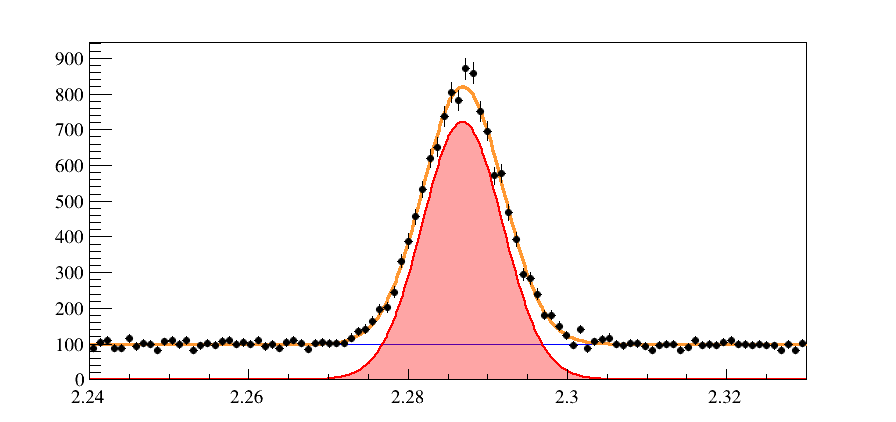

In [5]:
sigF = Models.Gauss_pdf("sigF",xvar=im,mean=(2.287,2.280,2.294),sigma=(0.005,0.0001,0.015))
bkgF = Models.PolyPos_pdf("bkgF", xvar=im, power=0)
modelF = Models.Fit1D(signal=sigF, background=bkgF)
r,w = modelF.fitTo(large_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

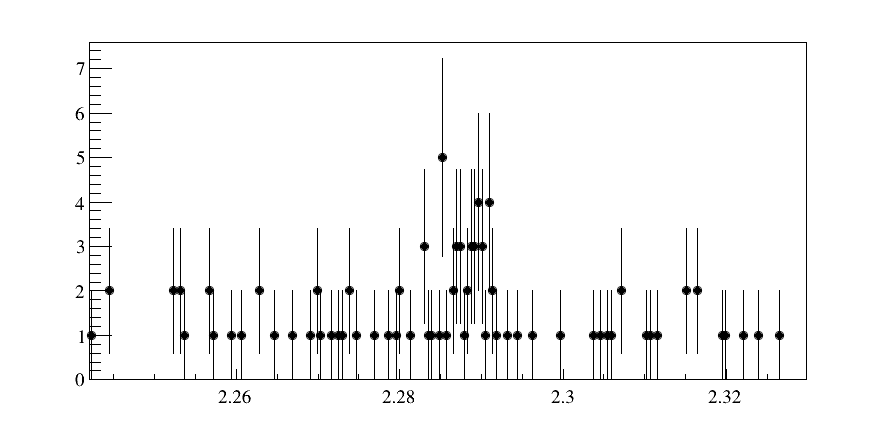

In [41]:
small_ds = model.generate(100)
small_ds.draw("im")
canv.Draw()


  RooFitResult: minimized FCN value: -637.231, estimated distance to minimum: 9.01004e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    6.2204e+01    6.2176e+01 +/-  8.66e+00  0.264113
                     S    3.7826e+01    3.7811e+01 +/-  7.12e+00  0.300755
             mean_sigF    2.2881e+00    2.2881e+00 +/-  5.48e-04  0.282413
            sigma_sigF    2.6099e-03    2.6064e-03 +/-  4.83e-04  0.381184




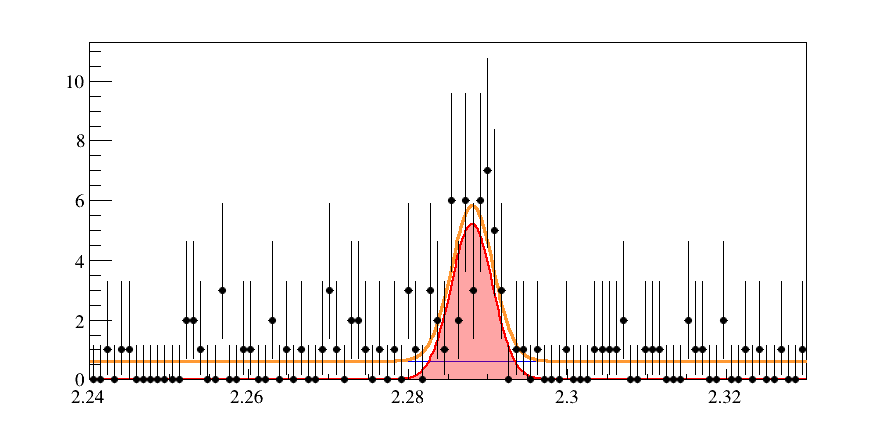

In [43]:
r,w = modelF.fitTo(small_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

# Fit1D(FitsigF)                   WARNING fitTo: covQual    is  2/full matrix but forced pos def 
# Fit1D(FitsigF)                   WARNING fitTo: covQual    is  2/full matrix but forced pos def 


( 2.59234 +- 0.00624287 )
( 0.624287 +- 0.00859073 )


'sigma_sig' : ( 0.005 +- 0 ) 

Warning in <TROOT::Append>: Replacing existing TH1: h_sigma (Potential memory leak).


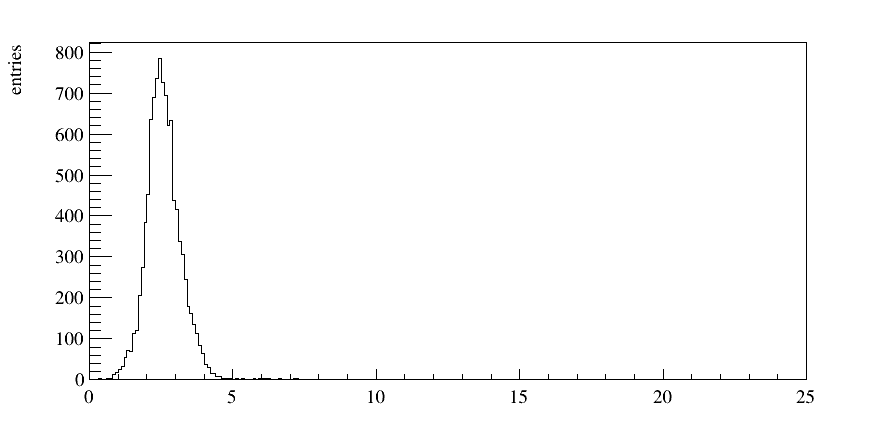

In [44]:
Nev=len(small_ds)
h_sigma = ROOT.TH1F("h_sigma",";#sigma, MeV;entries",250,0,25)
B=10000
argset = ROOT.RooArgSet( im )
dsb = ROOT.RooDataSet("dsb","bootstrap ds", argset)
for b in range(B):
    dsb.reset()
    for jj in range(Nev):
        im.setVal( small_ds[ROOT.gRandom.Integer(Nev)]["im"].value )
        dsb.add( argset )
    r,w = modelF.fitTo(dsb, draw=False, silent=True)
    h_sigma.Fill(1000.*r("sigma_sigF")[0].value())
h_sigma.Draw()
canv.Draw()
print(h_sigma.mean())
print(h_sigma.rms())
model.signal.sigma

In [29]:
print(h_sigma.mean())
print(h_sigma.rms())
model.signal.sigma

( 6.22966 +- 0.0390694 )
( 3.90694 +- 0.0252609 )


'sigma_sig' : ( 0.005 +- 0 ) 

In [12]:
h_sigma.rms()

( 0.219598 +- 0.0144101 )

In [13]:
h_sigma.mean()

( 3.4974 +- 0.0224126 )

In [14]:
SigmaMain

3.5554673381941164

In [15]:
Nev

24166

In [16]:
print(r("sigma_sig"))

(( 0.00351545 +- 0.00023462 ), 'sigma_sig' : ( 0.00351545 +- 0.00023462 ) )
